In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt


In [34]:
class IMAGE():
    def __init__(self,path):
#         load image
        self.img = imageio.v2.imread('./'+path+'.img')
    
    def histogram(self):
#         compute histogram of image
        self.xbin = np.arange(self.img.min(),self.img.max()+1,1)
        self.hist = np.empty_like(self.xbin)
        for i,x in enumerate(self.xbin):
            self.hist[i] = np.sum(self.img == x)
        self.prob = self.hist/np.prod(self.img.shape)
        
        
def jointHist(hist1,hist2,savename=None,plot=True,vmax=1e10):
#     compute joint histogram or joint probability given two distribution
    hist1 = hist1.reshape(-1,1)
    hist2 = hist2.reshape(1,-1)
    jointhist = hist1@hist2
    if plot == True:
        plt.figure()
        plt.imshow(jointhist,cmap='gray',vmax=vmax)
        plt.title(savename)
        plt.savefig('./'+savename+'.png')
        plt.show()
    return jointhist

def Entropy(prob):
#     compute entropy given distribution 
    entro = np.sum(-1*prob*np.log(prob+1e-8))
    return entro
        
def mutualInfo(e1,e2,jointe):
    return e1+e2-jointe

def plotHist(xbin,hist,path):
    plt.figure()
    plt.bar(xbin,hist)
    plt.title('histogram of '+path)
    plt.savefig('./'+path+'_hist.png')
    plt.show()
        
def initialize(path):
    img = IMAGE(path)
    img.histogram()
    entropy = Entropy(img.prob)
    plotHist(img.xbin,img.hist,path)
    return img,entropy
    
            


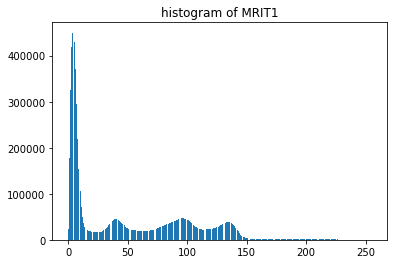

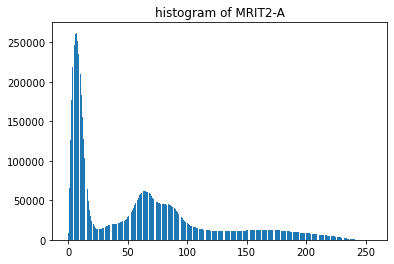

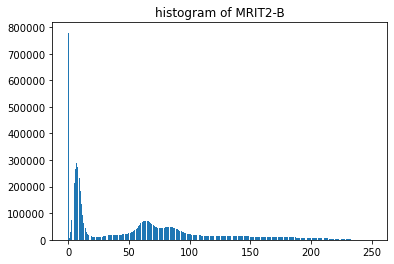

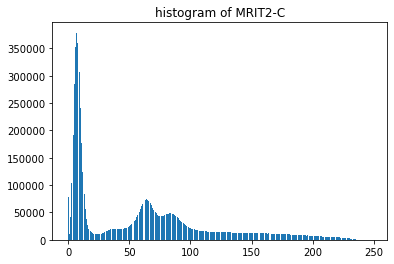

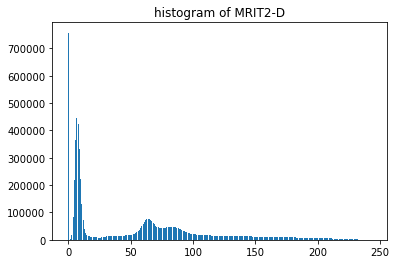

In [96]:
root = './pics/
img1, e1 = initialize(root+'MRIT1')
img2a, e2a = initialize(root+'MRIT2-A')
img2b, e2b = initialize(root+'MRIT2-B')
img2c, e2c = initialize(root+'MRIT2-C')
img2d, e2d = initialize(root+'MRIT2-D')


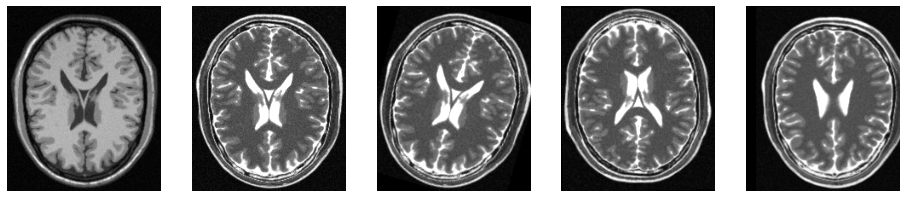

In [84]:
plt.figure(figsize=(16,4))
vmax = 200

plt.subplot(151)
plt.imshow(img1.img[90],cmap='gray',vmax=vmax)
plt.axis('off')
plt.subplot(152)
plt.imshow(img2a.img[90],cmap='gray',vmax=vmax)
plt.axis('off')
plt.subplot(153)
plt.imshow(img2b.img[90],cmap='gray',vmax=vmax)
plt.axis('off')
plt.subplot(154)
plt.imshow(img2c.img[90],cmap='gray',vmax=vmax)
plt.axis('off')
plt.subplot(155)
plt.imshow(img2d.img[90],cmap='gray',vmax=vmax)
plt.axis('off')
plt.savefig(root+'./all.png')
plt.show()


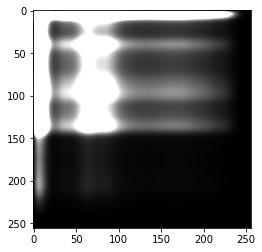

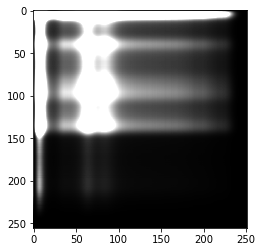

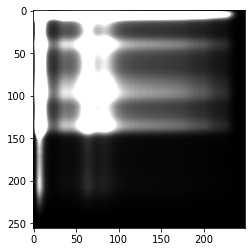

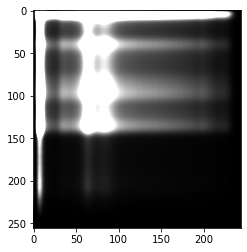

In [88]:
vmax = 1e9
jointHist_1_2a = jointHist(img1.hist,img2a.hist,root+'Joint_hist_of_MRIT1&MRIT2-A',vmax=vmax)
jointHist_1_2b = jointHist(img1.hist,img2b.hist,root+'Joint_hist_of_MRIT1&MRIT2-B',vmax=vmax)
jointHist_1_2c = jointHist(img1.hist,img2c.hist,root+'Joint_hist_of_MRIT1&MRIT2-C',vmax=vmax)
jointHist_1_2d = jointHist(img1.hist,img2d.hist,root+'Joint_hist_of_MRIT1&MRIT2-D',vmax=vmax)

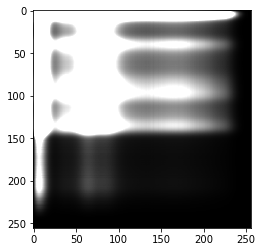

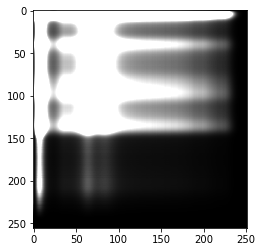

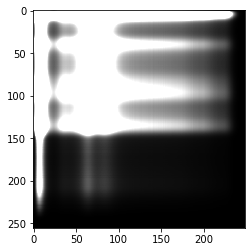

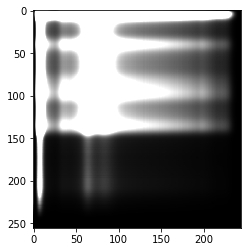

In [95]:
vmax = 1e-5
jointE_1_2a = jointHist(img1.prob,img2a.prob,root+'Joint_E_of_MRIT1&MRIT2-A',vmax=vmax)
jointE_1_2b = jointHist(img1.prob,img2b.prob,root+'Joint_E_of_MRIT1&MRIT2-B',vmax=vmax)
jointE_1_2c = jointHist(img1.prob,img2c.prob,root+'Joint_E_of_MRIT1&MRIT2-C',vmax=vmax)
jointE_1_2d = jointHist(img1.prob,img2d.prob,root+'Joint_E_of_MRIT1&MRIT2-D',vmax=vmax)

In [62]:
jointE2a = Entropy(jointE_1_2a)
jointE2b = Entropy(jointE_1_2b)
jointE2c = Entropy(jointE_1_2c)
jointE2d = Entropy(jointE_1_2d)

In [63]:
jointE2a,jointE2b,jointE2c,jointE2d,

(9.384310462468546, 9.212607527219868, 9.278576379129639, 9.02778558226767)

In [64]:
mutual2a = mutualInfo(e1,e2a,jointE2a)
mutual2b = mutualInfo(e1,e2b,jointE2b)
mutual2c = mutualInfo(e1,e2c,jointE2c)
mutual2d = mutualInfo(e1,e2d,jointE2d)

In [65]:
mutual2a,mutual2b,mutual2c,mutual2d

(0.000599862214070157,
 0.0005867654823976665,
 0.0005861150279109495,
 0.0005753766295857332)